In [27]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from keras.models import Sequential
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_curve, average_precision_score,precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [28]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train',
    target_size=(250, 250),
    batch_size= 16,
    class_mode = 'categorical'
)
test_datagen = ImageDataGenerator(
    rescale = 1./225
)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test',
    target_size=(250, 250),
    batch_size=16,
    class_mode='categorical',
    shuffle=False 
)

Found 9246 images belonging to 2 classes.
Found 506 images belonging to 2 classes.


In [29]:
model = Sequential([
    layers.Conv2D(32,(2,2),activation="relu",input_shape=(250, 250,3),padding="valid"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding="valid"),
    
    layers.Conv2D(64,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(256,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(512,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(1024,(2,2),activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(1024,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(2,activation="softmax")
])
model.summary()
from tensorflow.keras.callbacks import ModelCheckpoint
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("model_epoch_{epoch:02d}.keras",  # Save file as 'model_epoch_01.h5', 'model_epoch_02.h5', etc.
                             save_weights_only=False,  # Saves the entire model (architecture + weights)
                             save_freq='epoch',        # Save after every epoch
                             verbose=1)
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=[early_stopping,checkpoint]
)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)                   │ (None, 249, 249, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_99               │ (None, 249, 249, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_66 (MaxPooling2D)      │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 123, 123, 64)        │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_100              │ (None, 123, 123, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_67 (MaxPooling2D)      │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 60, 60, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_101              │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_68 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 29, 29, 256)         │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_102              │ (None, 29, 29, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_69 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 13, 13, 512)         │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_103              │ (None, 13, 13, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_70 (MaxPooling2D)      │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 5, 5, 1024)          │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_104              │ (None, 5, 5, 1024)          │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_71 (MaxPooling2D)      │ (None, 2, 2, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,663,074 (29.23 MB)

 Trainable params: 7,655,458 (29.20 MB)

 Non-trainable params: 7,616 (29.75 KB)

Epoch 1/20
578/578 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.6408 - loss: 0.7638
Epoch 1: saving model to model_epoch_01.keras
578/578 ━━━━━━━━━━━━━━━━━━━━ 150s 238ms/step - accuracy: 0.6408 - loss: 0.7636 - val_accuracy: 0.5534 - val_loss: 0.8621
Epoch 2/20
578/578 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.7297 - loss: 0.5710
Epoch 2: saving model to model_epoch_02.keras
578/578 ━━━━━━━━━━━━━━━━━━━━ 131s 224ms/step - accuracy: 0.7298 - loss: 0.5709 - val_accuracy: 0.7036 - val_loss: 0.9355
Epoch 3/20
577/578 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.7830 - loss: 0.4671
Epoch 3: saving model to model_epoch_03.keras
578/578 ━━━━━━━━━━━━━━━━━━━━ 130s 222ms/step - accuracy: 0.7830 - loss: 0.4671 - val_accuracy: 0.7095 - val_loss: 0.8152
Epoch 4/20
577/578 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.8039 - loss: 0.4263
Epoch 4: saving model to model_epoch_04.keras
578/578 ━━━━━━━━━━━━━━━━━━━━ 131s 223ms/step - accuracy: 0.8039 - loss: 0.4263 - val_accuracy: 0.7589

578/578 ━━━━━━━━━━━━━━━━━━━━ 126s 218ms/step - accuracy: 0.9420 - loss: 0.1382
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9418 - loss: 0.1751
Train Accuracy: 0.9422
Validation Accuracy: 0.9150


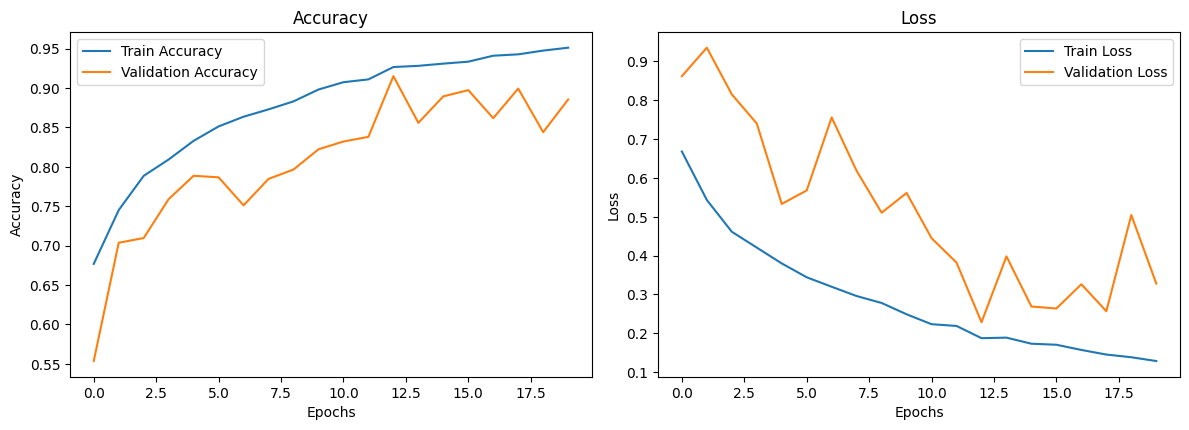

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step


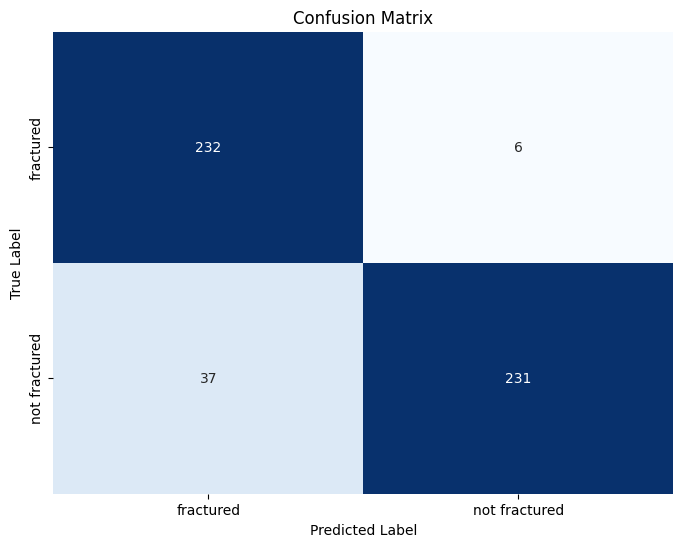

Classification Report:
               precision    recall  f1-score   support

    fractured       0.86      0.97      0.92       238
not fractured       0.97      0.86      0.91       268

     accuracy                           0.92       506
    macro avg       0.92      0.92      0.92       506
 weighted avg       0.92      0.92      0.92       506



In [30]:
train_loss, train_acc = model.evaluate(train_generator)
val_loss, val_acc = model.evaluate(test_generator)
print(f'Train Accuracy: {train_acc:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')

# Save the model
model.save('citrus_disease_detection_v1.h5')

# Example usage of the prediction function
def predict_xray_image(model, img_path):
    img = image.load_img(img_path, target_size=(250, 250))  # Match size to model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)

    if prediction[0] > 0.5:
        result = 'Positive'
    else:
        result = 'Negative'

    plt.imshow(img)
    plt.title(f'Prediction: {result}')
    plt.show()

# Visualize metrics using Pandas and Matplotlib
history_df = pd.DataFrame(history.history)

# Plot multiple graphs (Accuracy and Loss)
plt.figure(figsize=(12, 8))

# Subplot for accuracy
plt.subplot(2, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot for loss
plt.subplot(2, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Generate predictions for the test set
Y_pred = model.predict(test_generator)
Y_pred = np.argmax(Y_pred,axis=1)
Y_pred = (Y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, Y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(test_generator.classes, Y_pred, target_names=test_generator.class_indices.keys()))